# KUIS 2 Pembelajaran Mesin

### Nama : R. Sunu Raihan Wicaksono
### Kelas : TI-3A
### NIM : 1941720100

## Tentang dataset

Pada sebuah lembaga kemanusiaan berbasis teknologi informasi, dibentuk beberapa tim kemanusiaan yang bertugas untuk terjun ke masyarakat memberikan bantuan dalam bentuk aplikasi komputer atau layanan pelatihan IT.  Kegiatn tersebut dilaksanakan setiap tahun dengan ketentuan anggota organisasi tersebut dapat bergabung ke beberapa tim sebagai ketua atau anggota. Terdapat pula anggota yang sudah tidak aktif di organisasi tersebut (terhapus di database mereka —> label N/A).  Organisasi tersebut juga melakukan rekrutmen volunteer, namun tidak semua tim menggunakan bantuan volunteer. Hasil kegiatan dari setiap tim dapat diwujudkan ke dalam sebuah pengakuan hak cipta atau publikasi karya ilmiah atau publikasi berita di media massa.

## Ketentuan
1. Pengerjaan secara individu alias setiap mahasiswa!
2. Terdapat data dengan nilai #N/A, pertimbangkan cara terbaik untuk mengatasi nilai tersebut.
3. Tidak boleh ada duplikasi pekerjaan antar mahasiswa
4. Berikan penjelasan untuk setiap tahapan. Jangan hanya kode!

## Soal
1. Lakukan pemilahan data training dan testing yang sesuai dan proporsional dari data tersebut! (10 poin)
2. Tentukan data validasi! (10 poin)
3. Tentukan secara tepat kolom yang menjadi "label" (20 poin)
4. Terapkan dua jenis metode klasifikasi dan lakukan perbandingan akurasi  dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan! (20 poin)
5. Lakukan tunning hyperparameter berdasarkan hasil klasifikasi pada nomor 3 menggunakan metode Grid Search dan Random Search! Simpulkan parameter apa yang paling baik digunakan berdasarkan metode klasifikasi yang dipilih, dan berapa akurasinya. (40 poin)

In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel('dataset_quiz.xlsx')

df.head(100)

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,7214.0,7109.0,8402.0,7903.0,9202.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,5911.0,8201.0,8701.0,9101.0,9003.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,8402.0,7702.0,8602.0,8903.0,8903.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,8201.0,8305.0,5911.0,5903.0,8402.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,8803.0,8804.0,9102.0,8005.0,9303.0,NaN,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
81,6211.0,8901.0,9003.0,9303.0,9007.0,NaN,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
82,8601.0,8903.0,8703.0,NaN,NaN,NaN,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
83,8703.0,8601.0,9202.0,9102.0,6204.0,NaN,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


In [2]:
# Cek data yang kosong
df.isna().sum()

id_ketua               3
id_anggota1            5
id_anggota2            4
id_anggota3            3
id_anggota4           13
id_anggota5           84
keterlibatan_vltr      0
jml_vltr_terlibat      0
tahun                  0
skema                  0
luaran_hki             0
jenis_luaran_hki       0
potensi_hki            0
luaran_lain            0
jenis_luaran_lain      0
status_luaran_lain     0
dtype: int64

In [3]:
# Menghilangkan data null
df.drop('id_anggota5', axis=1, inplace=True) #Kolom id_anggota5 saya drop/hapus karena hanya memiliki satu data saja yang menyebabkan tidak adanya data modus.

#Untuk kolom yang lain saya masukkan data berupa modus dari masing-masing kolom.
modus_ketua = df['id_ketua'].mode()[0]
df['id_ketua'] = df['id_ketua'].fillna(modus_ketua)

modus_anggota1 = df['id_anggota1'].mode()[0]
df['id_anggota1'] = df['id_anggota1'].fillna(modus_anggota1)

modus_anggota2 = df['id_anggota2'].mode()[0]
df['id_anggota2'] = df['id_anggota2'].fillna(modus_anggota2)

modus_anggota3 = df['id_anggota3'].mode()[0]
df['id_anggota3'] = df['id_anggota3'].fillna(modus_anggota3)

modus_anggota4 = df['id_anggota4'].mode()[0]
df['id_anggota4'] = df['id_anggota4'].fillna(modus_anggota4)
# Cek Data
df.head()

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,7214.0,7109.0,8402.0,7903.0,9202.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,5911.0,8201.0,8701.0,9101.0,9003.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,8402.0,7702.0,8602.0,8903.0,8903.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,8201.0,8305.0,5911.0,5903.0,8402.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


In [4]:
# Cek kembali data yang kosong
df.isna().sum()

id_ketua              0
id_anggota1           0
id_anggota2           0
id_anggota3           0
id_anggota4           0
keterlibatan_vltr     0
jml_vltr_terlibat     0
tahun                 0
skema                 0
luaran_hki            0
jenis_luaran_hki      0
potensi_hki           0
luaran_lain           0
jenis_luaran_lain     0
status_luaran_lain    0
dtype: int64

In [5]:
# Proses Encoding
# Fungsi encoding yang akan saya digunakan adalah LabelEncoder
# Saya menggunakan LabelEncoder karena saya hanya perlu mengubah label yang berisi data kategorikal.

from sklearn.preprocessing import LabelEncoder

# Inisiasi label encoder
encode = LabelEncoder()

# Terpakan label encoder
df['keterlibatan_vltr'] = encode.fit_transform(df['keterlibatan_vltr'])
df['skema'] = encode.fit_transform(df['skema'])
df['luaran_hki'] = encode.fit_transform(df['luaran_hki'])
df['jenis_luaran_hki'] = encode.fit_transform(df['jenis_luaran_hki'])
df['potensi_hki'] = encode.fit_transform(df['potensi_hki'])
df['luaran_lain'] = encode.fit_transform(df['luaran_lain'])
df['jenis_luaran_lain'] = encode.fit_transform(df['jenis_luaran_lain'])
df['status_luaran_lain'] = encode.fit_transform(df['status_luaran_lain'])

df.head(100)

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,0,0,2019,1,1,1,2,0,3,1
1,7214.0,7109.0,8402.0,7903.0,9202.0,0,0,2019,1,1,1,2,0,3,1
2,5911.0,8201.0,8701.0,9101.0,9003.0,0,0,2019,1,1,1,2,0,3,1
3,8402.0,7702.0,8602.0,8903.0,8903.0,0,0,2019,1,1,1,2,0,3,1
4,8201.0,8305.0,5911.0,5903.0,8402.0,0,0,2019,1,1,1,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,8803.0,8804.0,9102.0,8005.0,9303.0,1,3,2022,1,1,1,2,0,3,1
81,6211.0,8901.0,9003.0,9303.0,9007.0,1,3,2022,1,1,1,2,0,3,1
82,8601.0,8903.0,8703.0,8602.0,8901.0,1,3,2022,1,1,1,2,0,3,1
83,8703.0,8601.0,9202.0,9102.0,6204.0,1,3,2022,1,1,1,2,0,3,1


In [6]:
#Proses Selesksi fitur
X = df.iloc[:,7:-1]

#Karena membandingkan apakah keterlibatan volunteer mempengaruhi hasil luaran pada kolom-kolom lainnya
y = df['keterlibatan_vltr']

X.shape


(85, 7)

In [7]:
#Proses pemisahan untuk training dan validasi data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_val, X_unseen, y_val, y_unseen = train_test_split(X_test, y_test, test_size=0.5, random_state=10)

In [8]:
#Klasifikasi menggunakan DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Sesuaikan dt ke set training
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Memprediksi label set test
y_pred_dt = dt.predict(X_test)

# Menghitung set accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Test set accuracy: {:.2f}".format(acc_dt))
print(f"Test set accuracy: {acc_dt}")

Test set accuracy: 0.59
Test set accuracy: 0.5882352941176471


In [9]:
#Klasifikasi menggunakan RandomForesClassifier
from sklearn.ensemble import RandomForestClassifier

# Sesuaikan rf ke set training
rf = RandomForestClassifier(n_estimators=20, random_state=5)
rf.fit(X_train, y_train)

# Memprediksi label set test
y_pred_rf = rf.predict(X_test)

# Menghitung set accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Test set accuracy: {:.2f}".format(acc_rf))
print(f"Test set accuracy: {acc_rf}")

Test set accuracy: 0.59
Test set accuracy: 0.5882352941176471


In [10]:
from sklearn.metrics import roc_curve, roc_auc_score

clf_tree = DecisionTreeClassifier()
clf_rand = RandomForestClassifier()

clf_tree.fit(X_train, y_train)
clf_rand.fit(X_train, y_train)

y_score1 = clf_tree.predict_proba(X_test)[:,1]
y_score2 = clf_rand.predict_proba(X_test)[:,1]

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)

print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for Random Forest: ', roc_auc_score(y_test, y_score2))

roc_auc_score for DecisionTree:  0.5
roc_auc_score for Random Forest:  0.4305555555555556


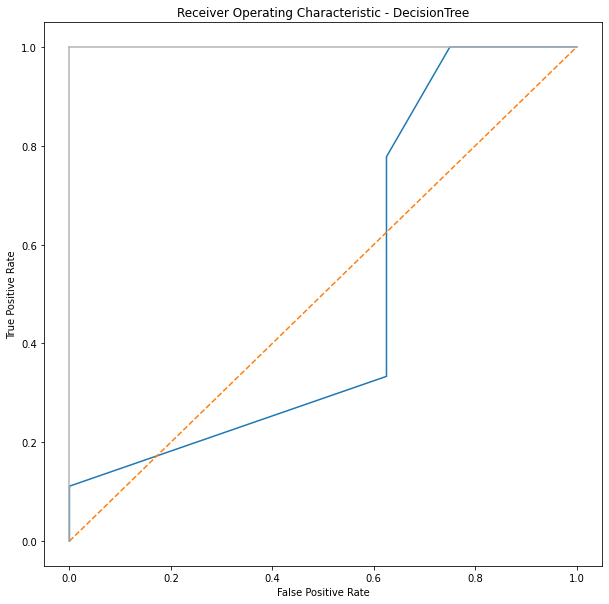

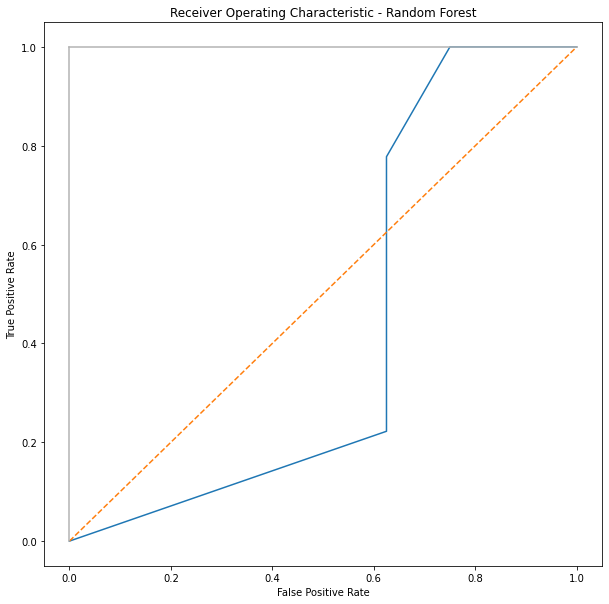

In [11]:
from matplotlib import pyplot as plt

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
# GridSearch menggunakan Decission Tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

dt = DecisionTreeClassifier()

#inisiasi repeated k-fold
cv = RepeatedKFold(n_splits=4, n_repeats=3, random_state=42)

# Definisikan hyperparameter yang akan digunakan
params = {
    'criterion' : ['gini'],
    'max_depth' : list(range(5,11))
}

# inisiasi grid berdasarkan nilai repeated k-fold dan hyperparameter
grid = GridSearchCV(clf_tree, param_grid=params, cv=cv)

# Fit / latih berdasarkan grid
%timeit grid.fit(X,y)

# Evaluasi dengan score
score = grid.score(X,y)

print(f'Hasil evaluasi: {score}')
print(f'Konfigurasi hyperparameter : {grid.best_params_}')

302 ms ± 12.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Hasil evaluasi: 0.7529411764705882
Konfigurasi hyperparameter : {'criterion': 'gini', 'max_depth': 7}


In [22]:
# Definisikan hyperparameter yang akan digunakan
params = {
    'criterion' : ['entropy'],
    'max_depth' : list(range(5,11))
}

# inisiasi grid berdasarkan nilai repeated k-fold dan hyperparameter
grid = GridSearchCV(clf_tree, param_grid=params, cv=cv)

# Fit / latih berdasarkan grid
%timeit grid.fit(X,y)

# Evaluasi dengan score
score = grid.score(X,y)

print(f'Hasil evaluasi: {score}')
print(f'Konfigurasi hyperparameter : {grid.best_params_}')

296 ms ± 16.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Hasil evaluasi: 0.7529411764705882
Konfigurasi hyperparameter : {'criterion': 'entropy', 'max_depth': 8}


In [30]:
# Random search menggunakan Decission Tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold

#inisiasi repeated k-fold
cv = RepeatedKFold(n_splits=4, n_repeats=3, random_state=42)

# Definisikan hyperparameter yang akan digunakan
params = {
    'criterion' : ['gini'],
    'max_depth' : list(range(5,11))
}

# inisiasi grid berdasarkan nilai repeated k-fold dan hyperparameter
random = RandomizedSearchCV(clf_tree, params, cv=cv)

# Fit / latih berdasarkan random
%timeit random.fit(X,y)

# Evaluasi dengan score
score = random.score(X,y)

print(f'Hasil evaluasi: {score}')
print(f'Konfigurasi hyperparameter : {random.best_params_}')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:29

375 ms ± 121 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Hasil evaluasi: 0.788235294117647
Konfigurasi hyperparameter : {'max_depth': 9, 'criterion': 'gini'}


In [31]:
# Definisikan hyperparameter yang akan digunakan
params = {
    'criterion' : ['entropy'],
    'max_depth' : list(range(5,11))
}

# inisiasi grid berdasarkan nilai repeated k-fold dan hyperparameter
random = RandomizedSearchCV(clf_tree, params, cv=cv)

# Fit / latih berdasarkan random
%timeit random.fit(X,y)

# Evaluasi dengan score
score = random.score(X,y)

print(f'Hasil evaluasi: {score}')
print(f'Konfigurasi hyperparameter : {random.best_params_}')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:29

309 ms ± 8.51 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Hasil evaluasi: 0.7529411764705882
Konfigurasi hyperparameter : {'max_depth': 8, 'criterion': 'entropy'}


#Kesimpulan

Untuk GridSearch saya menggunakan parameter gini dan entropy
dari kedua parameter yang saya gunakan keduanya menghasilkan tingkat akurasi yang sama dengan akurasi 75.2%

Lalu untuk RandomSearch saya menggunakan parameter gini dan entropy
dari kedua parameter yang menghasilkan akurasi terbaik adalah parameter gini dengan akurasi 78.8%